In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
combined_data = pd.read_csv('data/combined_data/cleaned_data.csv')

In [4]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [5]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.40130070313506305'

In [9]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.3202915645310599'

In [10]:
lin_reg.coef_

array([-15.84230876,  -0.72209799,  -2.51152075,  -1.38818232,
        -0.84155463,  -9.35371295, -11.32087403,   0.5496871 ])

In [11]:
lin_reg.intercept_

763.0768032875103

In [15]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 5)

In [18]:
score.mean()

0.12006321018947112

In [19]:
pred = lin_reg.predict(X_test)

In [20]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 55.121838068948826
Mean Sq Error: 5157.172338744654
Root Mean Error: 71.81345513721404


In [21]:
np.mean(cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=3))
# neg_mean_squared_error must be as close to 0 as possible


-4917.449370264193

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_cv = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=3)
ridge_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [23]:
ridge_cv.best_params_

{'alpha': 20}

In [24]:
ridge_cv.best_score_

-4894.025127178433

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso(tol=1)
# used tol = 1 since warning was given that convergence not taking place
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 50]}
lasso_cv = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=3)
lasso_cv.fit(X,y)

GridSearchCV(cv=3, estimator=Lasso(tol=1),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50]},
             scoring='neg_mean_squared_error')

In [26]:
lasso_cv.best_params_

{'alpha': 10}

In [27]:
lasso_cv.best_score_

-4739.948026506304

In [28]:
pred = lasso_cv.predict(X_test)

C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM_2_5', ylabel='Density'>

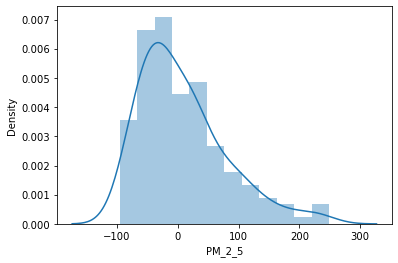

In [29]:
sns.distplot(y_test-pred)

In [30]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 55.12788944429777
Mean Sq Error: 5150.755452952491
Root Mean Error: 71.76876376915303


In [ ]:
import pickle
pickle.dump(lasso_cv, open('lasso.pkl', 'wb'))